In [11]:
import sys, os, time
import numpy as np
import scipy.io as io
import matplotlib.pyplot as plt
import pandas as pd

# %% MAIN CODE 

datadir = 'data/dataset3_m62/'
trackdata = io.loadmat(datadir+'downTrackdata.mat')
phi = trackdata['phi']; x = trackdata['x']; y = trackdata['y']; r=trackdata['r'];
speed = trackdata['speed']; t = trackdata['time'];
spikedata = io.loadmat(datadir+'spikes.mat')
spikes = spikedata['spikes']
params = spikedata['params']
fluodata = io.loadmat(datadir+'fissa_output.mat')
dfonf = fluodata['ddf_f']

# %% DETERMINE ESSENTIAL PARAMETERS 

#create cell 1 array 
cell_1 = dfonf[1,:] #extract the first row of the matrix corresponding to cell 1 values 
#create time array 
f_sampl = params[0][0][0][0][0] #determine the sampling frequency from params
print(f_sampl)
time_steps = np.arange(0,len(cell_1),1) #create rate of activity of the cell size 
time = 1/f_sampl * time_steps #create a time array using the time steps and sampling frequency



FileNotFoundError: [Errno 2] No such file or directory: 'data/dataset3_m62/downTrackdata.mat'

~ Plot the fluorescence in time series for cell 1

In [ ]:
plt.figure(1,figsize=(10,15))
plt.subplot(3, 1, 1)
plt.plot(cell_1, 'r') #plot cell 1 fluorescence
plt.xlabel('Time (s)')
plt.ylabel('Fluorescence (ΔF/F)')
plt.title('Fluorescence Time Series of cell 1')

plt.tick_params(axis='both', labelsize = 5)

plt.show()





~ Plot the angular position of the mouse as a function of time

In [ ]:
plt.figure(1,figsize=(10,15))

plt.subplot(3, 1, 2)
plt.plot(time, phi, 'g') #plot angular position against time 
plt.xlabel('Time (s)')
plt.ylabel('Angular position of the mouse (deg)')
plt.title('\n\nAngular position of the mouse as a function of time')

plt.tick_params(axis='both', labelsize = 5)
plt.show()

~ Plot the trajectory of the mouse in space throughout the duration of the recording

NameError: name 'x' is not defined

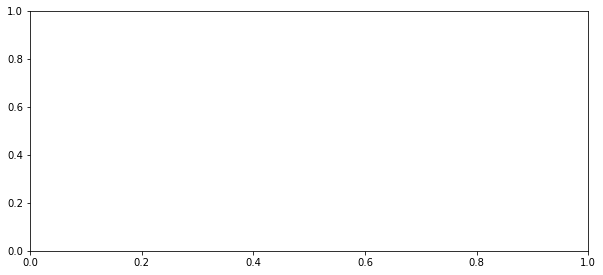

In [4]:
# %% Q1 - c

plt.figure(1,figsize=(10,15))

plt.subplot(3,1,3)
plt.plot(x,y)
plt.xlabel('Position on the x-axis (mm)')
plt.ylabel('Position on the y-axis (mm)')
plt.title('Trajectory of the mouse in space')
plt.tick_params(axis='both', labelsize = 5)

plt.show()


~ Plot the average response of cell 1 at each angular position phi

NameError: name 'cell_1' is not defined

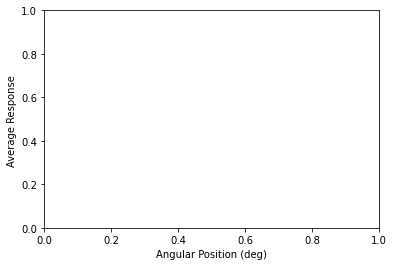

In [5]:
def average_mean(v,p): #classifying into different bins 
    average_mean = np.zeros(360)
    for i in range (0,360):
        average_mean[i]= v[(p.round().flatten() % 360) == i].mean() #round and average each phi from different time
    return average_mean

plt.xlabel('Angular Position (deg)')
plt.ylabel('Average Response ')
plt.plot(average_mean(cell_1,phi))

plt.show()

~ Produce a delay embedding with m=2 for cell 1

In [6]:
# %% Q2

# %% STEP 1 - AUTOCORRELATION 

from scipy.signal import correlate

#autocor of the signal 

cell_1_mean = np.mean(cell_1)
autocorr = correlate(cell_1-cell_1_mean,cell_1-cell_1_mean) #-mean for first 0 crossing??? + add smoothing

#%% NORMALISATION OF THE AUTOCORRELATION BY ITS MAXIMUM VALUE 

norm_autocorr = autocorr/np.max(autocorr) 
ctr = int(np.floor(np.size(autocorr)/2))
w = 2000 #increase to visualise the 0 crossings 
idx_autocorr = range(ctr-w,ctr+w)
autocorr_ = autocorr[idx_autocorr]
norm_autocorr_ = norm_autocorr[idx_autocorr]
t_autocorr = np.arange(0-w/f_sampl,0+w/f_sampl,1/f_sampl)


plt.figure(10)
plt.clf()
plt.plot(t_autocorr,norm_autocorr_)
plt.axhline(linestyle='--')
plt.xlabel('Lag (ms)')
plt.ylabel('Normalised Autocorrelation')
plt.title('Autocorrelation of the cell signal\n')

plt.figure(1,figsize=(10,15))
plt.show()

NameError: name 'cell_1' is not defined

In [ ]:
plt.figure(1,figsize=(10,15))
    
plt.subplot(3,1,1)

print('GRAPH 1')
tau_0 = 5 #set time lag 1 in ms 
L= len(cell_1)
idx_x = range(0,L-tau_0)
idx_y = range(tau_0,L)
plt.plot(cell_1[idx_x],cell_1[idx_y],'-,',color='b',linewidth=0.4)
plt.xlabel('time (t)')
plt.ylabel('successive time (t+1)')
plt.title('Delay Embedding with tau=5ms and m=2')
plt.show()



In [ ]:
print('GRAPH 2')
plt.figure(1,figsize=(10,15))

plt.subplot(3,1,3)
tau_2 = 45 #set time lag 2 in ms 
L= len(cell_1)
idx_x = range(0,L-tau_2)
idx_y = range(tau_2,L)
plt.plot(cell_1[idx_x],cell_1[idx_y],'-,',color='b',linewidth=0.4)
plt.xlabel('time (t)')
plt.ylabel('successive time (t+1)')
plt.title('Delay Embedding with tau=45ms and m=2\n')

plt.show()


GRAPH 3


NameError: name 'cell_1' is not defined

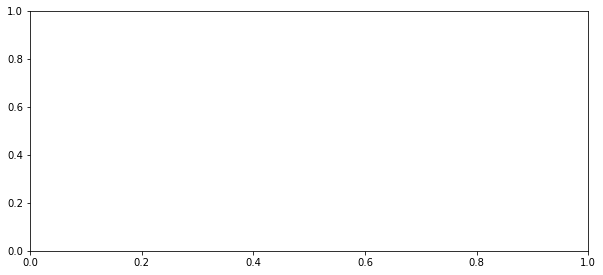

In [7]:
print('GRAPH 3')
plt.figure(1,figsize=(10,15))

plt.subplot(3,1,2)
tau_1 = 15 #set time lag 3 in ms 
L= len(cell_1)
idx_x = range(0,L-tau_1)
idx_y = range(tau_1,L)
plt.plot(cell_1[idx_x],cell_1[idx_y],'-,',color='b',linewidth=0.4)
plt.xlabel('time (t)')
plt.ylabel('successive time (t+tau)')
plt.title('Delay Embedding with tau=15ms and m=2\n')

plt.show()

~ Make a recurrence plot of the activity of cell 1

NameError: name 'cell_1' is not defined

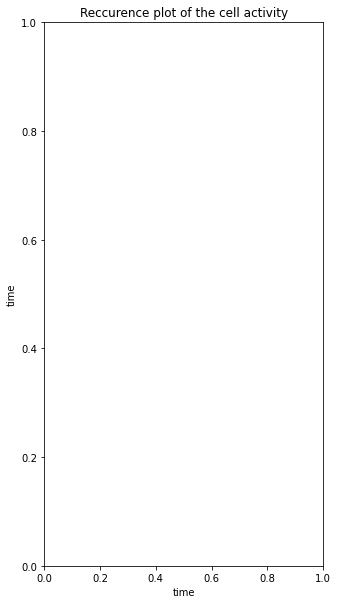

In [8]:
# %% Q3 
from scipy.spatial.distance import pdist, squareform

plt.figure(1,figsize=(5,10))

plt.xlabel('time')
plt.ylabel('time')
plt.title('Reccurence plot of the cell activity')

 
cell_1 = cell_1 [::5] #downsampling to every 5th point 

def rec_plot(s, eps=0.2, steps=10): #if tolerance too small, difficult to visualise
    d = pdist(s[:,None])  
    d = np.floor(d/eps)
    d[d>steps] = steps
    Z = squareform(d)
    return Z

M = rec_plot(cell_1)
plt.imshow(M)
plt.show()


~ Plot the activity of the whole population of neurons over time as an image

In [9]:
# %% Q4 

dfonf = np.array(dfonf)
img = plt.imshow(dfonf,aspect='auto')

plt.xlabel('Time (sec)')
plt.ylabel('Neuron')
cbar = plt.colorbar(img, shrink=0.8, pad=0.13)
cbar.set_label('Angular position of the mouse(degree)', labelpad=10)
plt.show()

NameError: name 'dfonf' is not defined

In [10]:
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

# PCA METHOD to obtain all eigenvalues and eigenvectors
X= dfonf.T #transpose of the cell
pca = PCA(n_components=3) #obtain eigenvalues and eigenvectors with the PCA function
X_pca = pca.fit_transform(X) 


plt.scatter(X_pca[:,0], X_pca[:,1], c=phi, s=0.5)
plt.title("PCA space", fontsize=20)
plt.xlabel('Component 1')
plt.ylabel('Compenent 2')
cbar = plt.colorbar()
cbar.set_label('angular position of the mouse (degree)', labelpad=10)
plt.show()

plt.scatter(X_pca[:,0], X_pca[:,2], c=phi, s=0.5)
plt.title("PCA space", fontsize=20)
plt.xlabel('Component 1')
plt.ylabel('Compenent 3')
cbar = plt.colorbar()
cbar.set_label('angular position of the mouse (degree)', labelpad=10)
plt.show()

plt.scatter(X_pca[:,1], X_pca[:,2], c=phi, s=0.5)
plt.title("PCA space", fontsize=20)
plt.xlabel('Component 2')
plt.ylabel('Compenent 3')
cbar = plt.colorbar()
cbar.set_label('angular position of the mouse (degree)', labelpad=10)
plt.show()


fig,ax = plt.subplots(figsize=(10, 15))
ax=plt.axes(projection='3d')


C1 = X_pca[:,0] #component 1
C2 = X_pca[:,1] #component 2
C3 = X_pca[:,2] #component 3


scatterPlot = ax.scatter3D(C1,C2,C3, c=phi, s=0.2)
cbar = plt.colorbar(scatterPlot, shrink=0.2, pad=0.13)
cbar.set_label('Angular position of the mouse(degree)', labelpad=10)
ax.set_xlabel('Component1')
ax.set_ylabel('Component2')
ax.set_zlabel('Component3')
ax.set_title('PCA space')

plt.show()


NameError: name 'dfonf' is not defined